In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, plot_confusion_matrix
import seaborn as sns


# Divisão da base de dados e pré-processamento

In [2]:
base = pd.read_csv("abalone.csv")
base.info()

attributes = base.iloc[:, 1:9].values
sex = base.iloc[:, 0].values

scaler = MinMaxScaler(feature_range=(-1, 1))
attributes = scaler.fit_transform(attributes)

labelencoder = LabelEncoder()
sex = labelencoder.fit_transform(sex)
sex_dummy = np_utils.to_categorical(sex)
#001 - 2 - M
#010 - 1 - I
#100 - 0 - F
X_train, X_test, y_train, y_test =  train_test_split(attributes, sex_dummy, shuffle=True, random_state=1, test_size=.25)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Construção da topologia da RNA

In [3]:
classifier = Sequential()
classifier.add(Dense(units=8, activation="linear",input_dim=8))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=8, activation="linear"))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=3, activation="softmax"))
classifier.compile(optimizer="adam", loss="categorical_crossentropy",
                      metrics=["categorical_accuracy"])
history = classifier.fit(X_train, y_train, batch_size=16,
                  epochs=300,validation_split=0.25)

Epoch 1/300
147/147 [==============================] - 1s 4ms/step - loss: 1.0495 - categorical_accuracy: 0.4419 - val_loss: 0.9625 - val_categorical_accuracy: 0.5402
Epoch 2/300
147/147 [==============================] - 0s 3ms/step - loss: 0.9504 - categorical_accuracy: 0.5130 - val_loss: 0.9082 - val_categorical_accuracy: 0.5390
Epoch 3/300
147/147 [==============================] - 0s 3ms/step - loss: 0.9180 - categorical_accuracy: 0.5223 - val_loss: 0.9003 - val_categorical_accuracy: 0.5070
Epoch 4/300
147/147 [==============================] - 0s 3ms/step - loss: 0.9224 - categorical_accuracy: 0.5270 - val_loss: 0.8987 - val_categorical_accuracy: 0.5032
Epoch 5/300
147/147 [==============================] - 1s 4ms/step - loss: 0.9125 - categorical_accuracy: 0.5292 - val_loss: 0.9011 - val_categorical_accuracy: 0.5045
Epoch 6/300
147/147 [==============================] - 0s 3ms/step - loss: 0.9154 - categorical_accuracy: 0.5236 - val_loss: 0.8930 - val_categorical_accuracy: 0.527

Epoch 50/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8760 - categorical_accuracy: 0.5424 - val_loss: 0.8764 - val_categorical_accuracy: 0.5377
Epoch 51/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8782 - categorical_accuracy: 0.5334 - val_loss: 0.8740 - val_categorical_accuracy: 0.5338
Epoch 52/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8785 - categorical_accuracy: 0.5521 - val_loss: 0.8719 - val_categorical_accuracy: 0.5568
Epoch 53/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8809 - categorical_accuracy: 0.5492 - val_loss: 0.8727 - val_categorical_accuracy: 0.5428
Epoch 54/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8780 - categorical_accuracy: 0.5475 - val_loss: 0.8752 - val_categorical_accuracy: 0.5492
Epoch 55/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8791 - categorical_accuracy: 0.5436 - val_loss: 0.8734 - val_categorical_accuracy:

Epoch 99/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8723 - categorical_accuracy: 0.5585 - val_loss: 0.8733 - val_categorical_accuracy: 0.5594
Epoch 100/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8714 - categorical_accuracy: 0.5492 - val_loss: 0.8770 - val_categorical_accuracy: 0.5236
Epoch 101/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8716 - categorical_accuracy: 0.5441 - val_loss: 0.8742 - val_categorical_accuracy: 0.5479
Epoch 102/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8719 - categorical_accuracy: 0.5517 - val_loss: 0.8756 - val_categorical_accuracy: 0.5160
Epoch 103/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8715 - categorical_accuracy: 0.5500 - val_loss: 0.8790 - val_categorical_accuracy: 0.5236
Epoch 104/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8685 - categorical_accuracy: 0.5624 - val_loss: 0.8798 - val_categorical_accu

147/147 [==============================] - 0s 2ms/step - loss: 0.8721 - categorical_accuracy: 0.5539 - val_loss: 0.8748 - val_categorical_accuracy: 0.5543
Epoch 148/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8651 - categorical_accuracy: 0.5539 - val_loss: 0.8776 - val_categorical_accuracy: 0.5262
Epoch 149/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8673 - categorical_accuracy: 0.5649 - val_loss: 0.8776 - val_categorical_accuracy: 0.5236
Epoch 150/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8683 - categorical_accuracy: 0.5632 - val_loss: 0.8806 - val_categorical_accuracy: 0.5160
Epoch 151/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8642 - categorical_accuracy: 0.5560 - val_loss: 0.8778 - val_categorical_accuracy: 0.5351
Epoch 152/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8701 - categorical_accuracy: 0.5598 - val_loss: 0.8763 - val_categorical_accuracy: 0.5377


147/147 [==============================] - 0s 2ms/step - loss: 0.8691 - categorical_accuracy: 0.5602 - val_loss: 0.8821 - val_categorical_accuracy: 0.5236
Epoch 196/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8613 - categorical_accuracy: 0.5670 - val_loss: 0.8779 - val_categorical_accuracy: 0.5390
Epoch 197/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8617 - categorical_accuracy: 0.5649 - val_loss: 0.8763 - val_categorical_accuracy: 0.5338
Epoch 198/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8673 - categorical_accuracy: 0.5611 - val_loss: 0.8775 - val_categorical_accuracy: 0.5223
Epoch 199/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8656 - categorical_accuracy: 0.5679 - val_loss: 0.8795 - val_categorical_accuracy: 0.5160
Epoch 200/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8634 - categorical_accuracy: 0.5611 - val_loss: 0.8855 - val_categorical_accuracy: 0.5198


147/147 [==============================] - 0s 2ms/step - loss: 0.8623 - categorical_accuracy: 0.5653 - val_loss: 0.8788 - val_categorical_accuracy: 0.5198
Epoch 243/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8669 - categorical_accuracy: 0.5504 - val_loss: 0.8764 - val_categorical_accuracy: 0.5479
Epoch 244/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8654 - categorical_accuracy: 0.5619 - val_loss: 0.8751 - val_categorical_accuracy: 0.5556
Epoch 245/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8640 - categorical_accuracy: 0.5611 - val_loss: 0.8827 - val_categorical_accuracy: 0.5109
Epoch 246/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8672 - categorical_accuracy: 0.5475 - val_loss: 0.8874 - val_categorical_accuracy: 0.5211
Epoch 247/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8657 - categorical_accuracy: 0.5602 - val_loss: 0.8816 - val_categorical_accuracy: 0.5453


147/147 [==============================] - 0s 2ms/step - loss: 0.8645 - categorical_accuracy: 0.5636 - val_loss: 0.8809 - val_categorical_accuracy: 0.5121
Epoch 291/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8652 - categorical_accuracy: 0.5568 - val_loss: 0.8758 - val_categorical_accuracy: 0.5453
Epoch 292/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8663 - categorical_accuracy: 0.5641 - val_loss: 0.8821 - val_categorical_accuracy: 0.5364
Epoch 293/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8635 - categorical_accuracy: 0.5611 - val_loss: 0.8771 - val_categorical_accuracy: 0.5390
Epoch 294/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8643 - categorical_accuracy: 0.5683 - val_loss: 0.8774 - val_categorical_accuracy: 0.5172
Epoch 295/300
147/147 [==============================] - 0s 2ms/step - loss: 0.8671 - categorical_accuracy: 0.5611 - val_loss: 0.8768 - val_categorical_accuracy: 0.5428


# Previsão da RNA

In [5]:
forecasts = classifier.predict(X_test)

result =  classifier.evaluate(X_test, y_test)

y_test_transform = [np.argmax(t) for t in y_test]
forecasts_transform = [np.argmax(t) for t in forecasts]

precision = accuracy_score(y_test_transform, forecasts_transform)
print(precision)
matrix = confusion_matrix(forecasts_transform, y_test_transform)

33/33 [==============================] - 0s 1ms/step - loss: 0.8401 - categorical_accuracy: 0.5770
0.5770334928229665


# Matriz de Confusão

Confusion matrix, without normalization
[[146  23 122]
 [ 61 281  88]
 [117  31 176]]


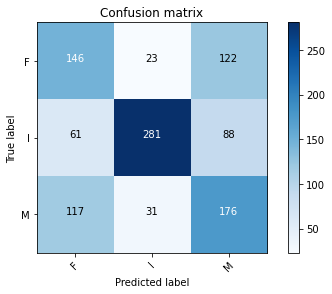

In [6]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(matrix,["F","I","M"])

# Métricas de Classificação

<AxesSubplot:>

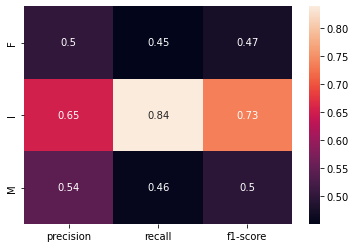

In [8]:
clf_report = classification_report(y_test_transform, forecasts_transform, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:-3].T, annot=True, yticklabels=["F","I","M"])